<a href="https://colab.research.google.com/github/rosegebhardt/Frequentist-ML/blob/master/market_basket.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install mlxtend

In [ ]:
#----------INCLUDE PACKAGES

import pandas as pd
import numpy as np
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt

from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [ ]:
#----------DATA READING 

raw_data = 'https://raw.githubusercontent.com/reisanar/datasets/master/BreadBasket.csv'
dataframe = pd.read_csv(raw_data, sep=',', header='infer')
data = dataframe[dataframe.Item != 'NONE'] 

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 15 Text major ticklabel objects>)

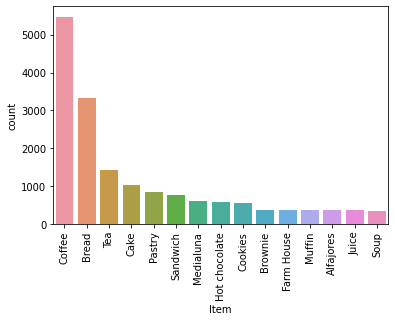

In [ ]:
#----------VISUALIZATION

sns.countplot(x = 'Item', data = data, order = data['Item'].value_counts().iloc[:15].index)
plt.xticks(rotation=90)

In [ ]:
#----------CONVERT DATA INTO USEFUL FORMAT

dataSet = []
for i in range(1,9685):
  filter_by_transaction = data[data.Transaction == i] 
  filter_by_item = filter_by_transaction.Item
  part_of_list = filter_by_item.values.tolist()
  dataSet.append(part_of_list)

te = TransactionEncoder()
te_ary = te.fit(dataSet).transform(dataSet)
dataset = pd.DataFrame(te_ary, columns=te.columns_)
dataset.describe()

,Adjustment,Afternoon with the baker,Alfajores,Argentina Night,Art Tray,Bacon,Baguette,Bakewell,Bare Popcorn,Basket,Bowl Nic Pitt,Bread,Bread Pudding,Brioche and salami,Brownie,Cake,Caramel bites,Cherry me Dried fruit,Chicken Stew,Chicken sand,Chimichurri Oil,Chocolates,Christmas common,Coffee,Coffee granules,Coke,Cookies,Crepes,Crisps,Drinking chocolate spoons,Duck egg,Dulce de Leche,Eggs,Ella's Kitchen Pouches,Empanadas,Extra Salami or Feta,Fairy Doors,Farm House,Focaccia,Frittata,...,Lemon and coconut,Medialuna,Mighty Protein,Mineral water,Mortimer,Muesli,Muffin,My-5 Fruit Shoot,Nomad bag,Olum & polenta,Panatone,Pastry,Pick and Mix Bowls,Pintxos,Polenta,Postcard,Raspberry shortbread sandwich,Raw bars,Salad,Sandwich,Scandinavian,Scone,Siblings,Smoothies,Soup,Spanish Brunch,Spread,Tacos/Fajita,Tartine,Tea,The BART,The Nomad,Tiffin,Toast,Truffles,Tshirt,Valentine's card,Vegan Feast,Vegan mincepie,Victorian Sponge
count,9684,9684,9684,9684,9684,9684,9684,9684,9684,9684,9684,9684,9684,9684,9684,9684,9684,9684,9684,9684,9684,9684,9684,9684,9684,9684,9684,9684,9684,9684,9684,9684,9684,9684,9684,9684,9684,9684,9684,9684,...,9684,9684,9684,9684,9684,9684,9684,9684,9684,9684,9684,9684,9684,9684,9684,9684,9684,9684,9684,9684,9684,9684,9684,9684,9684,9684,9684,9684,9684,9684,9684,9684,9684,9684,9684,9684,9684,9684,9684,9684
unique,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
top,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
freq,9683,9641,9340,9677,9646,9683,9532,9636,9679,9678,9682,6587,9680,9681,9305,8701,9681,9681,9561,9683,9682,9675,9673,5156,9677,9500,9169,9678,9670,9676,9672,9671,9656,9667,9677,9646,9682,9313,9630,9603,...,9678,9099,9673,9550,9679,9676,9320,9666,9676,9683,9679,8869,9672,9678,9683,9674,9681,9683,9585,9004,9409,9357,9682,9607,9358,9512,9682,9673,9638,8334,9683,9626,9538,9366,9492,9663,9671,9668,9632,9677


In [ ]:
#----------GET FREQUENT ITEMSETS USING MLXTEND

frequent_itemsets = apriori(dataset, min_support=0.01, use_colnames=True)
frequent_itemsets

,support,itemsets
0,0.035523,(Alfajores)
1,0.015696,(Baguette)
2,0.319806,(Bread)
3,0.039137,(Brownie)
4,0.101508,(Cake)
5,0.012701,(Chicken Stew)
6,0.467575,(Coffee)
7,0.019000,(Coke)
8,0.053181,(Cookies)
9,0.038311,(Farm House)


In [ ]:
#----------GET ASSOCIATION RULES USING MLXTEND

rules_set = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.4)
rules_set.sort_values(by=['confidence'],ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
13,(Toast),(Coffee),0.032838,0.467575,0.023131,0.704403,1.506500,0.007777,1.801181
12,(Spanish Brunch),(Coffee),0.017761,0.467575,0.010636,0.598837,1.280729,0.002331,1.327203
6,(Medialuna),(Coffee),0.060409,0.467575,0.034387,0.569231,1.217410,0.006141,1.235986
8,(Pastry),(Coffee),0.084159,0.467575,0.046468,0.552147,1.180873,0.007118,1.188839
0,(Alfajores),(Coffee),0.035523,0.467575,0.019207,0.540698,1.156386,0.002597,1.159203
5,(Juice),(Coffee),0.037691,0.467575,0.020136,0.534247,1.142589,0.002513,1.143147
9,(Sandwich),(Coffee),0.070219,0.467575,0.037381,0.532353,1.138539,0.004549,1.138518
2,(Cake),(Coffee),0.101508,0.467575,0.053490,0.526958,1.127002,0.006028,1.125534
10,(Scone),(Coffee),0.033767,0.467575,0.017658,0.522936,1.118399,0.001869,1.116044
3,(Cookies),(Coffee),0.053181,0.467575,0.027571,0.518447,1.108798,0.002705,1.105640


In [ ]:
#----------FUNCTIONS FOR TEXTBOOK APROACH

# Get dataset
def loadDataSet():
  return dataSet

# Create first list of candidate itemsets
def createC1(dataSet):
    C1 = []
    for transaction in dataSet:
        for item in transaction:
            if not [item] in C1:
                C1.append([item])       
    C1.sort()
    return list(map(frozenset, C1))   

# Store support data
def scanD(D, Ck, minSupport):
    ssCnt = {}
    for tid in D:
        for can in Ck:
            if can.issubset(tid):
                if can not in ssCnt: ssCnt[can]=1
                else: ssCnt[can] += 1
    numItems = float(len(D))
    retList = []
    supportData = {}
    for key in ssCnt:
        support = ssCnt[key]/numItems
        if support >= minSupport:
            retList.insert(0,key)
        supportData[key] = support
    return retList, supportData

# Create kth list of candidate itemsets
def aprioriGen(Lk, k): #creates Ck
    retList = []
    lenLk = len(Lk)
    for i in range(lenLk):
        for j in range(i+1, lenLk): 
            L1 = list(Lk[i])[:k-2]; L2 = list(Lk[j])[:k-2]
            L1.sort(); L2.sort()
            if L1==L2: #if first k-2 elements are equal
                retList.append(Lk[i] | Lk[j]) #set union
    return retList

# Apriori algorithm
def apriori(dataSet, minSupport = 0.05):
    C1 = createC1(dataSet)
    D = list(map(set, dataSet))
    L1, supportData = scanD(D, C1, minSupport)
    L = [L1]
    k = 2
    while (len(L[k-2]) > 0):
        Ck = aprioriGen(L[k-2], k)
        Lk, supK = scanD(D, Ck, minSupport)#scan DB to get Lk
        supportData.update(supK)
        L.append(Lk)
        k += 1
    return L, supportData

# Get association rules from frequent datasets
def generateRules(L, supportData, minConf=0.7):  #supportData is a dict coming from scanD
    bigRuleList = []
    for i in range(1, len(L)):#only get the sets with two or more items
        for freqSet in L[i]:
            H1 = [frozenset([item]) for item in freqSet]
            if (i > 1):
                rulesFromConseq(freqSet, H1, supportData, bigRuleList, minConf)
            else:
                calcConf(freqSet, H1, supportData, bigRuleList, minConf)
    return bigRuleList         

# Get confidence from association rules 
def calcConf(freqSet, H, supportData, brl, minConf=0.07):
    prunedH = [] #create new list to return
    for conseq in H:
        conf = supportData[freqSet]/supportData[freqSet-conseq] #calc confidence
        if conf >= minConf: 
            print(freqSet-conseq,'-->',conseq,'conf:',conf)
            brl.append((freqSet-conseq, conseq, conf))
            prunedH.append(conseq)
    return prunedH

def rulesFromConseq(freqSet, H, supportData, brl, minConf=0.07):
    m = len(H[0])
    if (len(freqSet) > (m + 1)):  #try further merging
        Hmp1 = aprioriGen(H, m+1) #create Hm+1 new candidates
        Hmp1 = calcConf(freqSet, Hmp1, supportData, brl, minConf)
        if (len(Hmp1) > 1):       #need at least two sets to merge
            rulesFromConseq(freqSet, Hmp1, supportData, brl, minConf)

# Display association rules           
def pntRules(ruleList, itemMeaning):
    for ruleTup in ruleList:
        for item in ruleTup[0]:
            print(itemMeaning[item])
        print("           -------->")
        for item in ruleTup[1]:
            print(itemMeaning[item])
        print("confidence: %f" % ruleTup[2])
        print()       #print a blank line


In [ ]:
#----------GET FREQUENT DATASETS AND ASSOCIATION RULES FROM TEXTBOOK APPROACH

# Get dataset
dataSet = loadDataSet()

# Get frequent itemset
L, suppData = apriori(dataSet, minSupport=0.05)
print("Frequent Itemsets:")
print(L)
print("-------------------------------")
print("Association Rules:")
# Get association rules
generateRules(L, suppData, minConf=0.006)


Frequent Itemsets:
[[frozenset({'Sandwich'}), frozenset({'Cake'}), frozenset({'Tea'}), frozenset({'Medialuna'}), frozenset({'Pastry'}), frozenset({'Coffee'}), frozenset({'Hot chocolate'}), frozenset({'Cookies'}), frozenset({'Bread'})], [frozenset({'Coffee', 'Cake'}), frozenset({'Coffee', 'Bread'})], []]
-------------------------------
Association Rules:
frozenset({'Cake'}) --> frozenset({'Coffee'}) conf: 0.5269582909460835
frozenset({'Coffee'}) --> frozenset({'Cake'}) conf: 0.11439929328621909
frozenset({'Bread'}) --> frozenset({'Coffee'}) conf: 0.27510494026477234
frozenset({'Coffee'}) --> frozenset({'Bread'}) conf: 0.1881625441696113


[(frozenset({'Cake'}), frozenset({'Coffee'}), 0.5269582909460835),
 (frozenset({'Coffee'}), frozenset({'Cake'}), 0.11439929328621909),
 (frozenset({'Bread'}), frozenset({'Coffee'}), 0.27510494026477234),
 (frozenset({'Coffee'}), frozenset({'Bread'}), 0.1881625441696113)]